# Machine Learning and Logistic Regression in Heart Attack Risk Prediction for Female Populations
## 1. Domain Background

Cardiovascular diseases, particularly heart attacks, remain a leading cause of mortality globally, with distinct risk factors between men and women. This study, **"Machine Learning and Logistic Regression in Heart Attack Risk Prediction for Female Populations,"** seeks to address this gender gap by developing predictive models that specifically focus on women.

Using logistic regression and machine learning techniques, the goal is to analyze the key health risks contributing to heart attacks in women, including factors like age, cholesterol levels, blood pressure, diabetes, obesity, smoking, stress, and more.

### Heart Attack Symptoms in Women
Heart attack symptoms can be subtle in women and often differ from men’s classic symptoms (such as chest pain):
- **Fatigue**: Unusual fatigue, especially if it's new or dramatic, may be a warning sign.
- **Shortness of Breath**: Even without chest pain, it can indicate cardiovascular stress.
- **Back, Neck, or Jaw Pain**: These are more common heart attack symptoms in women.
- **Nausea or Vomiting**: Women may experience this symptom without any chest pain.
- **Lightheadedness or Dizziness**: This is also a possible warning sign.
- **Pressure or Tightness in the Chest**: Though chest pain is common in men, women often describe it as pressure or discomfort rather than sharp pain.

This project leverages a diverse dataset comprising attributes such as:
- Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, and Hemisphere.

These features allow for a comprehensive risk assessment and the identification of key contributors to heart attacks in female populations. Through this study, the goal is to create more personalized and accurate heart attack risk models tailored to women's health profiles.


Problem Statement

The aim is to develop a **Logistic Regression-based Machine Learning Model** to analyze the associations between females with predictions of heart attack, while seeking to understand the interrelationships and potential predictive factors such as:
- Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, and Hemisphere.

### Objective
1. Explore the patterns and associations between risk factors and heart attack predictions in women.
2. Develop predictive models to identify potential risk factors or indicators for the co-occurrence of heart attacks.
3. Provide insights that can contribute to the development of targeted interventions and personalized treatment approaches for women.

The predictive model aims for an accuracy of **80% as a baseline**, evaluated after detailed analysis using **Python for Data Science and Machine Learning Algorithms**.



Datasets and Inputs

**Dataset Source**: [Kaggle - Heart Attack Prediction Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset)

### Dataset Overview
- **Total Records**: 8,763 patient entries (6,111 males and 2,652 females).
- **Features Include**:
  - **Demographics**: Patient ID, Age, Sex, Income, Country, Continent, Hemisphere.
  - **Health Metrics**: Cholesterol, Blood Pressure, Heart Rate, Diabetes, BMI, Triglycerides.
  - **Lifestyle Factors**: Smoking, Alcohol Consumption, Exercise Hours Per Week, Diet, Physical Activity Days, Sedentary Hours, Sleep Hours.
  - **Medical History**: Family History, Previous Heart Problems, Medication Use, Stress Level.


### Variables
- **Predictor Variables (X)**:
  - Health Metrics, Lifestyle Factors, and Medical History.
- **Target Variable (Y)**:
  - Female > Heart Attack Risk (1: Yes, 0: No).

### Note
- Exclude **Male** entries and **Patient ID**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("ML and AI project kick-off!")

ML and AI project kick-off!


In [2]:
#DATA COLLECTION
#When dealing with nominal and ordinal variables in exploratory data analysis (EDA) using Python, there are several algorithms and techniques you can employ to gain insights into the data

In [3]:
#DATA COLLECTION
import pandas as pd #Load data in tabular format
all_heart_df1 = pd.read_csv("women_heart_attack_prediction_dataset.csv") #Load the file from the specific folder.
#Note: pd.read_csv and not Excel. Replace the \ for /. If the file has ; but need , use sep= ';' to replace the ; for ,


In [4]:
#S T A T I S T I C S (EDA)
#view the column headers for Heartdf1
all_heart_df1.keys() 

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [5]:
#S T A T I S T I C S (EDA)
#EXPLORATORY DATA ANALYSIS (EDA) 
    #DESCRIPTIVE STATISTICS
    #Central Tedency and Dispersion
all_heart_df1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [6]:
#S T A T I S T I C S (EDA)
#Looking the data:
#View the first 5 columns of the df
all_heart_df1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
#S T A T I S T I C S (EDA)
#Return the Mode: Use the value_counts() method in pandas to get the frequency count of each category in the nominal variable.
all_heart_df1.value_counts() 

Patient ID  Age  Sex     Cholesterol  Blood Pressure  Heart Rate  Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet       Previous Heart Problems  Medication Use  Stress Level  Sedentary Hours Per Day  Income  BMI        Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  Country        Continent      Hemisphere           Heart Attack Risk
AAA9246     61   Male    171          148/90          89          1         1               1        0        1                    8.123736                 Unhealthy  1                        0               9             8.453044                 108612  27.098445  626            3                                5                    New Zealand    Australia      Southern Hemisphere  0                    1
RPT9211     37   Male    394          133/90          70          0         0               1        0        1                    1.165282                 Average    1                   

In [8]:
#S T A T I S T I C S (EDA)
#View information about the total counts of the data, range, data type, memory usage:
all_heart_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#S T A T I S T I C S (EDA)

# all_heart_df1 is DataFrame
# Copy the DataFrame to avoid modifying the original data
df = all_heart_df1.copy()

# Binning continuous variables into categories for better analysis
# Adjust bin edges and labels as per domain knowledge or data distribution

# Age: Bins can be adjusted based on the dataset's age distribution
age_bins = [0, 30, 40, 50, 60, 70, np.inf]
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
print("Age Group Distribution:")
print(df[['Age', 'Age_Group']].head())

Age Group Distribution:
   Age Age_Group
0   67     60-69
1   21       <30
2   21       <30
3   84       70+
4   66     60-69


In [11]:
# Cholesterol: Standard medical categorizations
cholesterol_bins = [0, 200, 239, np.inf]
cholesterol_labels = ['Desirable', 'Borderline High', 'High']
df['Cholesterol_Level'] = pd.cut(df['Cholesterol'], bins=cholesterol_bins, labels=cholesterol_labels)
print("\nCholesterol Level Distribution:")
print(df[['Cholesterol', 'Cholesterol_Level']].head())


Cholesterol Level Distribution:
   Cholesterol Cholesterol_Level
0          208   Borderline High
1          389              High
2          324              High
3          383              High
4          318              High


In [12]:
# Check unique values in 'Blood Pressure' to identify problematic entries
print("Unique values before processing:", df['Blood Pressure'].unique())

# Convert 'Blood Pressure' to numeric, coercing invalid strings to NaN
df['Blood Pressure'] = pd.to_numeric(df['Blood Pressure'], errors='coerce')

# Handle missing values (e.g., replace with mean or drop rows with NaN)
df['Blood Pressure'].fillna(df['Blood Pressure'].mean(), inplace=True)

# Define bins and labels for blood pressure categories
bp_bins = [0, 120, 129, 139, 179, np.inf]
bp_labels = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']

# Apply binning to categorize blood pressure levels
df['BP_Category'] = pd.cut(df['Blood Pressure'], bins=bp_bins, labels=bp_labels)

# Check the result
print("\nBlood Pressure Category Distribution:")
print(df[['Blood Pressure', 'BP_Category']].head())


Unique values before processing: ['158/88' '165/93' '174/99' ... '137/94' '94/76' '119/67']

Blood Pressure Category Distribution:
   Blood Pressure BP_Category
0             NaN         NaN
1             NaN         NaN
2             NaN         NaN
3             NaN         NaN
4             NaN         NaN


In [13]:
# Blood Pressure: Based on standard hypertension categories
bp_bins = [0, 120, 129, 139, 179, np.inf]
bp_labels = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
df['BP_Category'] = pd.cut(df['Blood Pressure'], bins=bp_bins, labels=bp_labels)
print("\nBlood Pressure Category Distribution:")
print(df[['Blood Pressure', 'BP_Category']].head())


Blood Pressure Category Distribution:
   Blood Pressure BP_Category
0             NaN         NaN
1             NaN         NaN
2             NaN         NaN
3             NaN         NaN
4             NaN         NaN


In [30]:
# Example dataset: Replace 'Heart Rate' with your actual data column
data = {
    'Heart Rate': np.random.randint(40, 150, 1000)  # Simulated heart rate data
}
df = pd.DataFrame(data)

# Heart Rate: General categories
hr_bins = [0, 60, 100, np.inf]
hr_labels = ['Bradycardia', 'Normal', 'Tachycardia']
df['Heart_Rate_Category'] = pd.cut(df['Heart Rate'], bins=hr_bins, labels=hr_labels)

# Display heart rate category distribution
print("\nHeart Rate Category Distribution:")
print(df[['Heart Rate', 'Heart_Rate_Category']].head())

# Calculate totals for each category
hr_category_totals = df['Heart_Rate_Category'].value_counts()

# Display totals
print("\nHeart Rate Category Totals:")
print(hr_category_totals)


Heart Rate Category Distribution:
   Heart Rate Heart_Rate_Category
0         141         Tachycardia
1         125         Tachycardia
2          86              Normal
3         111         Tachycardia
4         103         Tachycardia

Heart Rate Category Totals:
Heart_Rate_Category
Tachycardia    470
Normal         345
Bradycardia    185
Name: count, dtype: int64


In [14]:
# Heart Rate: General categories
hr_bins = [0, 60, 100, np.inf]
hr_labels = ['Bradycardia', 'Normal', 'Tachycardia']
df['Heart_Rate_Category'] = pd.cut(df['Heart Rate'], bins=hr_bins, labels=hr_labels)

print("\nHeart Rate Category Distribution:")
print(df[['Heart Rate', 'Heart_Rate_Category']].head())


Heart Rate Category Distribution:
   Heart Rate Heart_Rate_Category
0          72              Normal
1          98              Normal
2          72              Normal
3          73              Normal
4          93              Normal


In [15]:
# BMI: Standard BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, np.inf]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity Class 1', 'Obesity Class 2']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
print("\nBMI Category Distribution:")
print(df[['BMI', 'BMI_Category']].head())


BMI Category Distribution:
         BMI     BMI_Category
0  31.251233  Obesity Class 1
1  27.194973       Overweight
2  28.176571       Overweight
3  36.464704  Obesity Class 2
4  21.809144    Normal weight


In [16]:
# Triglycerides: Standard medical categorizations
triglycerides_bins = [0, 150, 199, 499, np.inf]
triglycerides_labels = ['Normal', 'Borderline High', 'High', 'Very High']
df['Triglycerides_Level'] = pd.cut(df['Triglycerides'], bins=triglycerides_bins, labels=triglycerides_labels)
print("\nTriglycerides Level Distribution:")
print(df[['Triglycerides', 'Triglycerides_Level']].head())


Triglycerides Level Distribution:
   Triglycerides Triglycerides_Level
0            286                High
1            235                High
2            587           Very High
3            378                High
4            231                High


In [17]:
# Sleep Hours Per Day: Custom categories
sleep_bins = [0, 5, 7, 9, np.inf]
sleep_labels = ['Very Low', 'Low', 'Normal', 'High']
df['Sleep_Hours_Category'] = pd.cut(df['Sleep Hours Per Day'], bins=sleep_bins, labels=sleep_labels)
print("\nSleep Hours Category Distribution:")
print(df[['Sleep Hours Per Day', 'Sleep_Hours_Category']].head())



Sleep Hours Category Distribution:
   Sleep Hours Per Day Sleep_Hours_Category
0                    6                  Low
1                    7                  Low
2                    4             Very Low
3                    4             Very Low
4                    5             Very Low


In [18]:
# Encoding categorical variables
# List of categorical columns to encode
categorical_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
                       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Country', 
                       'Continent', 'Hemisphere', 'Age_Group', 'Cholesterol_Level', 'BP_Category', 
                       'Heart_Rate_Category', 'BMI_Category', 'Triglycerides_Level', 'Sleep_Hours_Category']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))
# Dropping original continuous columns if their binned counterparts are used
# df.drop(columns=['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'BMI', 'Triglycerides', 'Sleep Hours Per Day'], inplace=True)
# Now df is ready for logistic regression

In [19]:
# Output the first few rows of the transformed dataset to inspect
print("\nTransformed Data (First 5 Rows):")
print(df.head())


Transformed Data (First 5 Rows):
  Patient ID  Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    1          208             NaN          72         0   
1    CZE1114   21    1          389             NaN          98         1   
2    BNI9906   21    0          324             NaN          72         1   
3    JLN3497   84    1          383             NaN          73         1   
4    GFO8847   66    1          318             NaN          93         1   

   Family History  Smoking  Obesity  ...  Continent  Hemisphere  \
0               0        1        0  ...          5           1   
1               1        1        1  ...          4           0   
2               0        0        0  ...          3           0   
3               1        1        0  ...          4           0   
4               1        1        1  ...          1           0   

   Heart Attack Risk  Age_Group  Cholesterol_Level  BP_Category  \
0                  0          3  

In [20]:
#S T A T I S T I C S (EDA)
#Find duplicates in the df for each row True: Duplicate, False: Not duplicate:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [21]:
#S T A T I S T I C S (EDA)
#To find the number of duplicates:
df.duplicated().sum()

0

In [22]:
# check missing values in train data
df.isnull().sum()

Patient ID                            0
Age                                   0
Sex                                   0
Cholesterol                           0
Blood Pressure                     8763
Heart Rate                            0
Diabetes                              0
Family History                        0
Smoking                               0
Obesity                               0
Alcohol Consumption                   0
Exercise Hours Per Week               0
Diet                                  0
Previous Heart Problems               0
Medication Use                        0
Stress Level                          0
Sedentary Hours Per Day               0
Income                                0
BMI                                   0
Triglycerides                         0
Physical Activity Days Per Week       0
Sleep Hours Per Day                   0
Country                               0
Continent                             0
Hemisphere                            0


In [23]:
df['Sex'].value_counts()

Sex
1    6111
0    2652
Name: count, dtype: int64

In [24]:
sex_counts = all_heart_df1['Sex'].value_counts()

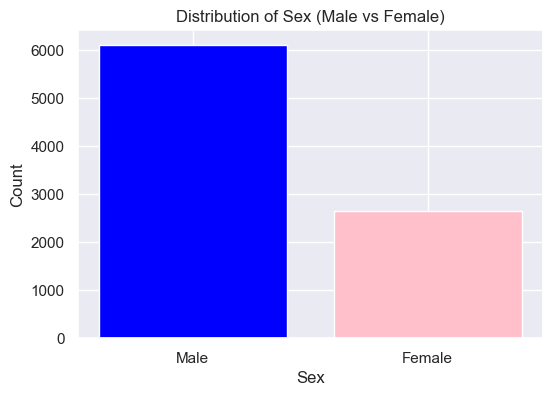

In [25]:
plt.figure(figsize=(6, 4))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])  # Customize colors if needed
plt.title('Distribution of Sex (Male vs Female)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
#Sex
#Total: 8763
    #Male      6111 equivalent to 69.7%
    #Female    2652 equivalent to 30.26%

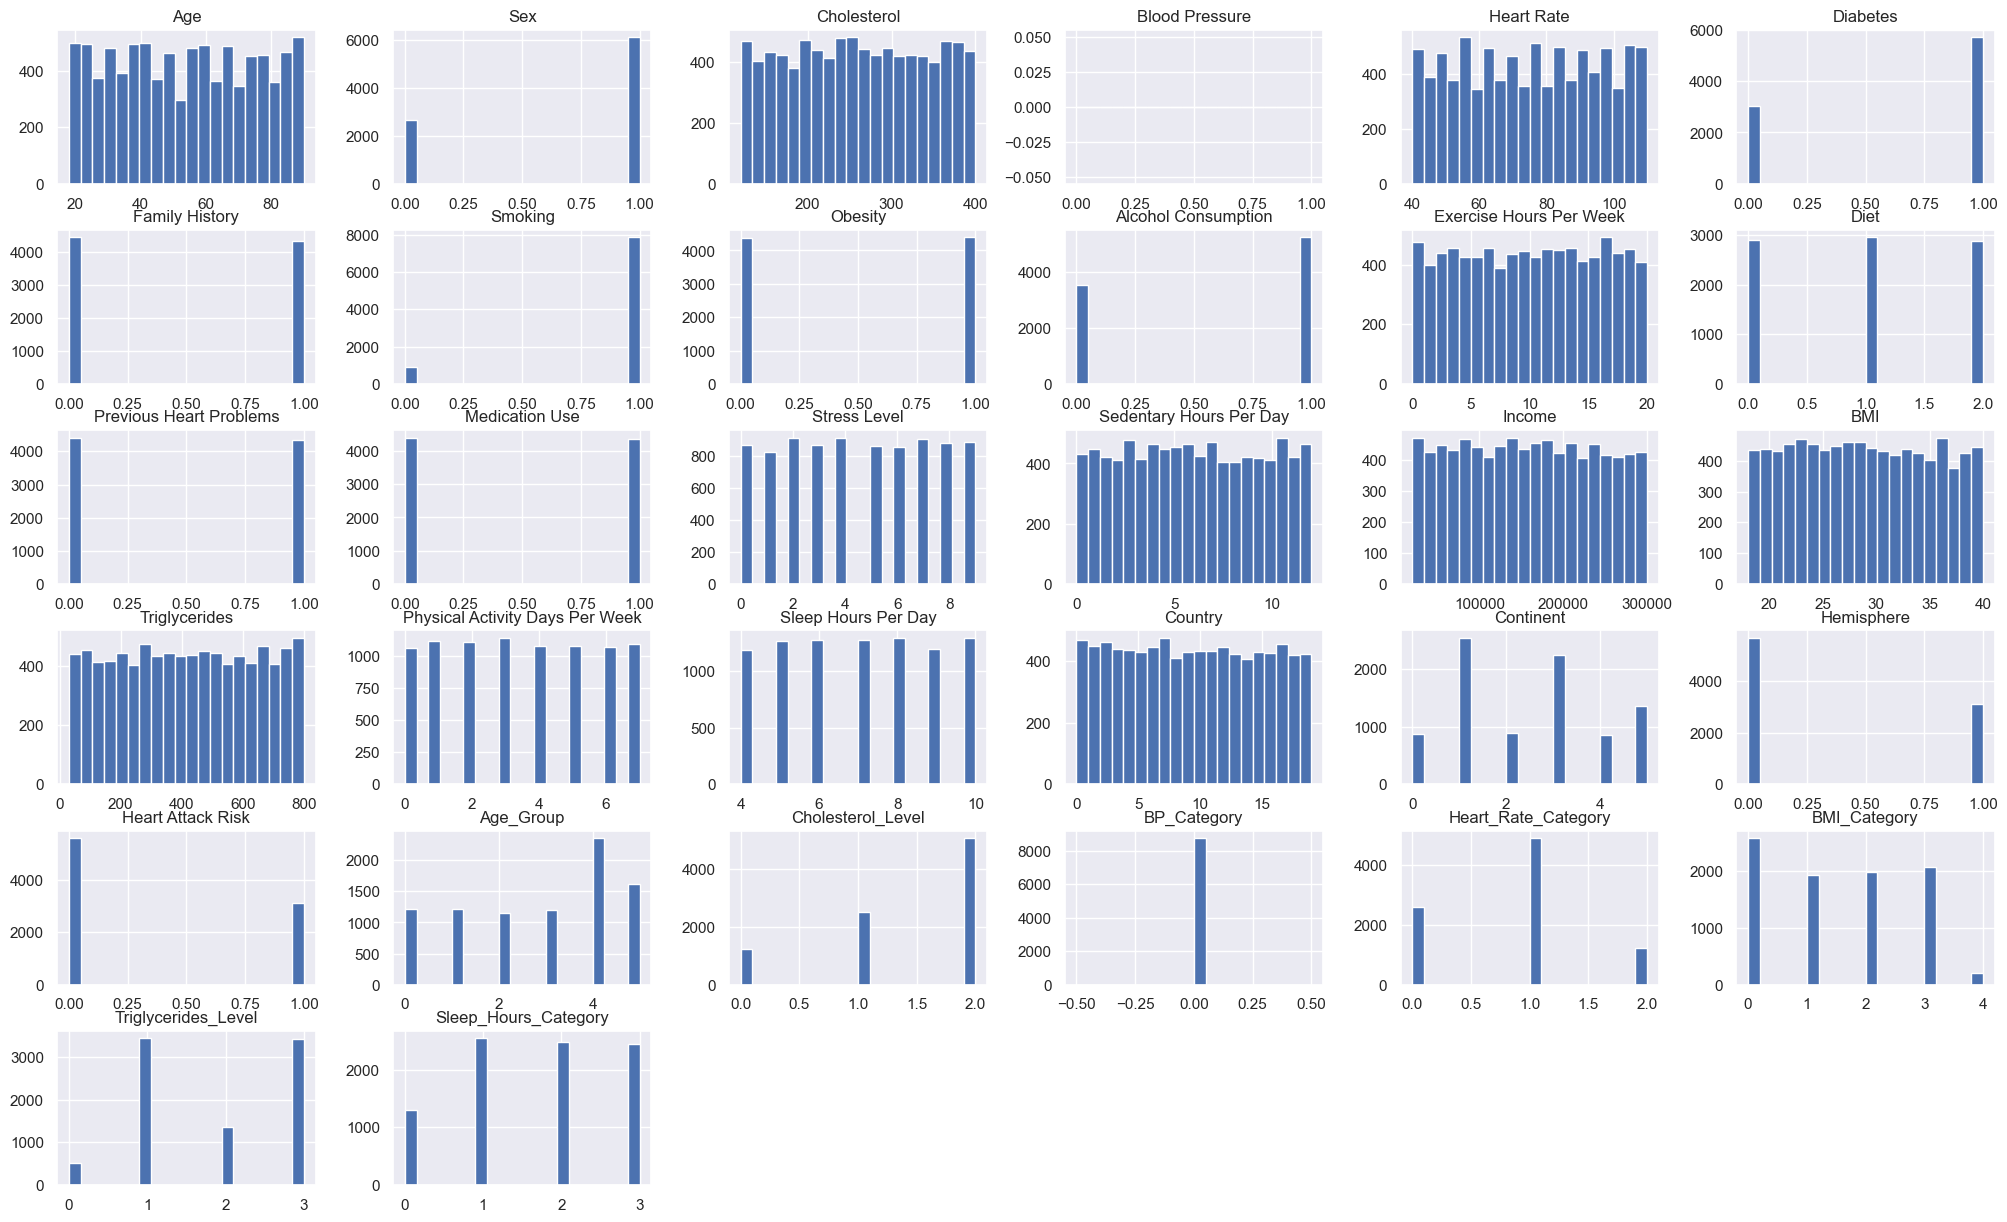

In [27]:
df.hist(bins=20 , figsize=(25,15))
plt.show()
#Age: Participant ages are presented from 20 to 90 years old.
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Cholesterol: Cholesterol levels of the patient. From 150 to 400. High cholesterol generally means your total cholesterol is 200 mg/dL or higher.
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Heart Rate: Heart rate of the patient from 40 to 110. heart rate can be defined as the number of heartbeats per minute. For healthy adults, the normal heart rate should be between 40 and 110 beats per minute at rest. 
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Diabetes: Whether the patient has diabetes (Yes/No)
    #Analysis: Left Skewed Distribution. (Negative-Skewed). Mean < Median
#Family History:  Family history of heart-related problems (1: Yes, 0: No)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Smoking: Smoking status of the patient (1: Smoker, 0: Non-smoker)
    #Analysis: Left Skewed Distribution. (Negative-Skewed). Mean < Median
#Obesity: Obesity status of the patient (1: Obese, 0: Not obese)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Alcohol Consumption: Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median. However, sligthy Left Skewed Distribution. (Negative-Skewed). Mean < Median
#Exercise Hours Per Week: Number of exercise hours per week
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Medication Use: Medication usage by the patient (1: Yes, 0: No)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Stress Level: Stress level reported by the patient (1-10)
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Sedentary Hours Per Day - Hours of sedentary activity per day
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Income: Income level of the patient
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#BMI: Body Mass Index (BMI) of the patient
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Triglycerides - Triglyceride levels of the patient
    #Analysis: Uniform Distribution. (equal spread, no picks) Mean = Median
#Physical Activity Days Per Week: Days of physical activity per week
    #Analysis:  Uniform Distribution. (equal spread, no picks) Mean = Median
#Sleep Hours Per Day: Hours of sleep per day
    #Analysis:  Uniform Distribution. (equal spread, no picks) Mean = Median
#Heart Attack Risk: Presence of heart attack risk (1: Yes, 0: No)
    #Analysis: Rigth Skewed Distribution. (Positive-Skewed). Mean > Median

In [29]:
#filter the data set just for women
    # Filter the DataFrame for only females
female_heart_df2 = df[df['Sex'] == 'Female']